In [1]:
# 분류 DNN 모델 구현 ########################
from keras import layers, models

Using TensorFlow backend.


In [0]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', 
                 input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', 
                 name='Hidden-2'))       
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', 
                         optimizer='adam', 
                         metrics=['accuracy'])

In [0]:
# 데이터 준비 ##############################
import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical

In [0]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib

def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

    
def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()            
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()
    
    
def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()            
    

In [0]:
# 학습 효과 분석 ##############################
import matplotlib.pyplot as plt


In [0]:
# 분류 DNN 학습 및 테스팅 ####################
def main():
    Nin = 784
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(Nin, Nh_l, Nout)
    history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)
    
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 101us/step - loss: 0.3817 - acc: 0.8913 - val_loss: 0.2052 - val_acc: 0.9378
Epoch 2/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.1520 - acc: 0.9556 - val_loss: 0.1430 - val_acc: 0.9588
Epoch 3/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.1082 - acc: 0.9680 - val_loss: 0.1139 - val_acc: 0.9674
Epoch 4/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.0837 - acc: 0.9746 - val_loss: 0.1019 - val_acc: 0.9703
Epoch 5/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.0668 - acc: 0.9799 - val_loss: 0.1228 - val_acc: 0.9639
Epoch 6/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.0545 - acc: 0.9839 - val_loss: 0.0975 - val_acc: 0.9713
Epoch 7

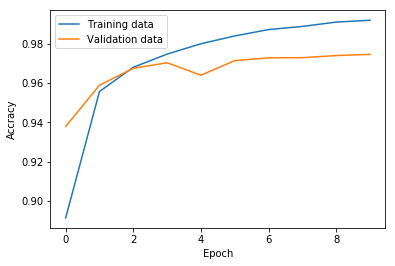

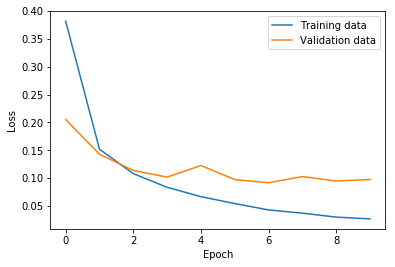

In [8]:
if __name__ == '__main__':
    main()